In [1]:
import sympy as sm
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import timeit

In [2]:
def RCP (t, u, r1, q1, aC1, eC1, hC1, mC1, aP1, eP1, mP1, hP1): 
    
    du = np.zeros([4, 1])
    
    #variables
    R = u[0]
    C = u[1]
    P = u[2]

    
    du[0] = r1*R*(1 - (R*q1)) - (aC1*R*C)/(1 + (aC1*hC1*R))
    du[1] = (eC1*aC1*R*C)/(1 + (aC1*hC1*R)) - (aP1*C*P)/(1+ (aP1*hP1*C)) - mC1*C
    du[2] = (eP1*aP1*C*P)/(1+ (aP1*hP1*C)) - mP1*P
    du[3] = 1
    
    du = du.reshape(4,)
    return(du)

In [3]:
pars = pd.read_csv("C:/SDMS/trophic_temp/param_hycub_H2.csv")
par1 = np.array(pars)
np.shape(par1)

(10, 1000)

In [12]:
i=0
r0 = par1[0][i]; q0 =  par1[1][i]
aC0 = par1[2][i]; eC0 = par1[3][i]; mC0 = par1[4][i]; hC0 = par1[5][i]
aP0 = par1[6][i]; eP0 = par1[7][i]; mP0 = par1[8][i]; hP0 = par1[9][i]

u0 = np.array([5000, 280, 58, 0])
p = (r0, q0, aC0, eC0, hC0, mC0, aP0, eP0, mP0, hP0)
print(p)

(2.241844911, 5.33e-05, 0.327153161, 0.487158819, 0.249835122, 0.051222569, 0.003081126, 0.487768621, 0.516552535, 0.231934724)


In [13]:
tend = 10000
t_span = (0, tend)
tint = np.linspace(0, tend, tend*10)

sol1 = solve_ivp (RCP, t_span, u0, args = p, t_eval = tint, method= 'RK45', rtol=1e-06, atol=1e-06)
print(np.shape(sol1.y))
print(np.shape(sol1.t))

(4, 100000)
(100000,)


In [14]:
u0 = np.array([7600, 530, 110, 0])
tend = 10000
t_span = (0, tend)
tint = np.linspace(0, tend, tend*10)

sol2 = solve_ivp (RCP, t_span, u0, args = p, t_eval = tint, method= 'RK45', rtol=1e-06, atol=1e-06)
print(np.shape(sol2.y))
print(np.shape(sol2.t))

(4, 100000)
(100000,)


In [15]:
ssv0 = sol1.y[:,5000:]
np.shape(ssv0)
tm = ssv0[3]; R0 = ssv0[0]; C0 = ssv0[1]; P0 = ssv0[2]

In [16]:
ssv1 = sol2.y[:,5000:]
np.shape(ssv1)
tm = ssv1[3]; R1 = ssv1[0]; C1 = ssv1[1]; P1 = ssv1[2]

<IPython.core.display.Javascript object>


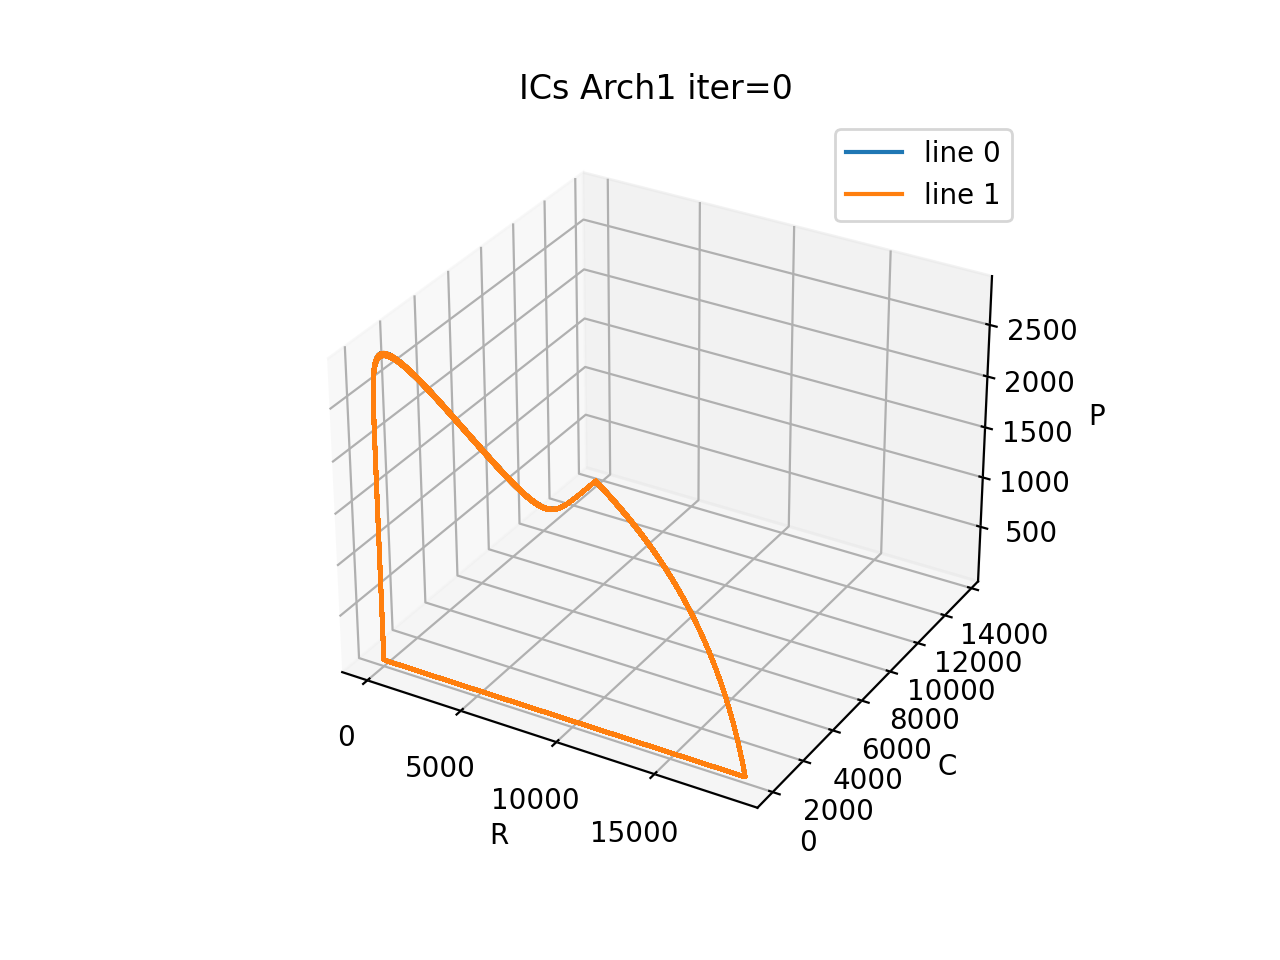

Text(0.5, 0, 'P')

In [20]:
%matplotlib notebook
fig = plt.figure()
ax = fig.add_subplot(1,1,1, projection='3d')
ax.plot(R0, C0, P0,  label = "line 0")
ax.plot(R1, C1, P1,  label = "line 1")
ax.set_title("ICs Arch1 iter=0")
ax.legend()
ax.set_xlabel("R"); ax.set_ylabel("C"); ax.set_zlabel("P")

<IPython.core.display.Javascript object>


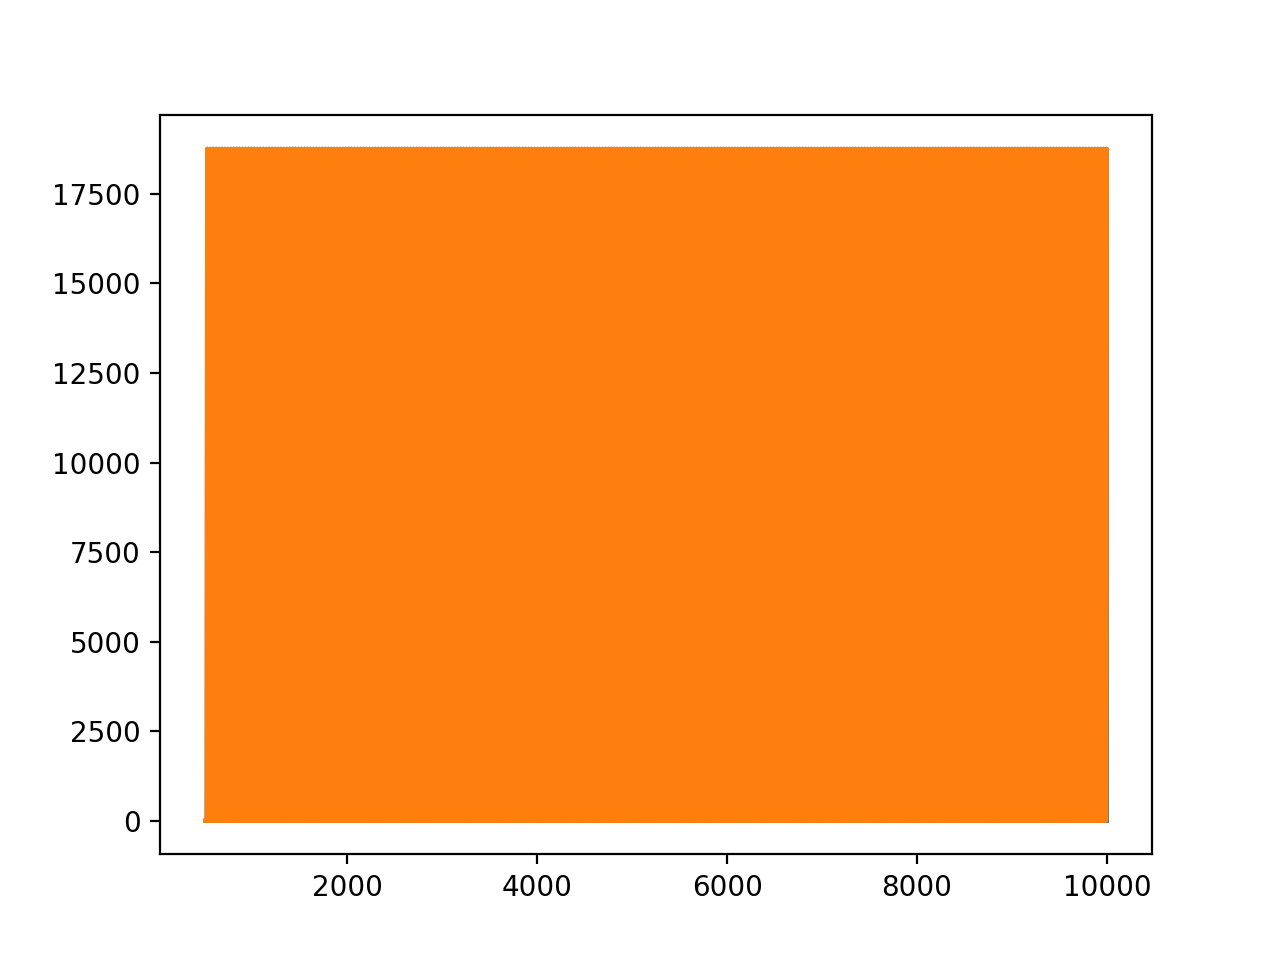

In [25]:
%matplotlib notebook
plt.plot(tm, R0, label = 'IC0')
plt.plot(tm, R1, label = 'IC1')
plt.show()

<IPython.core.display.Javascript object>


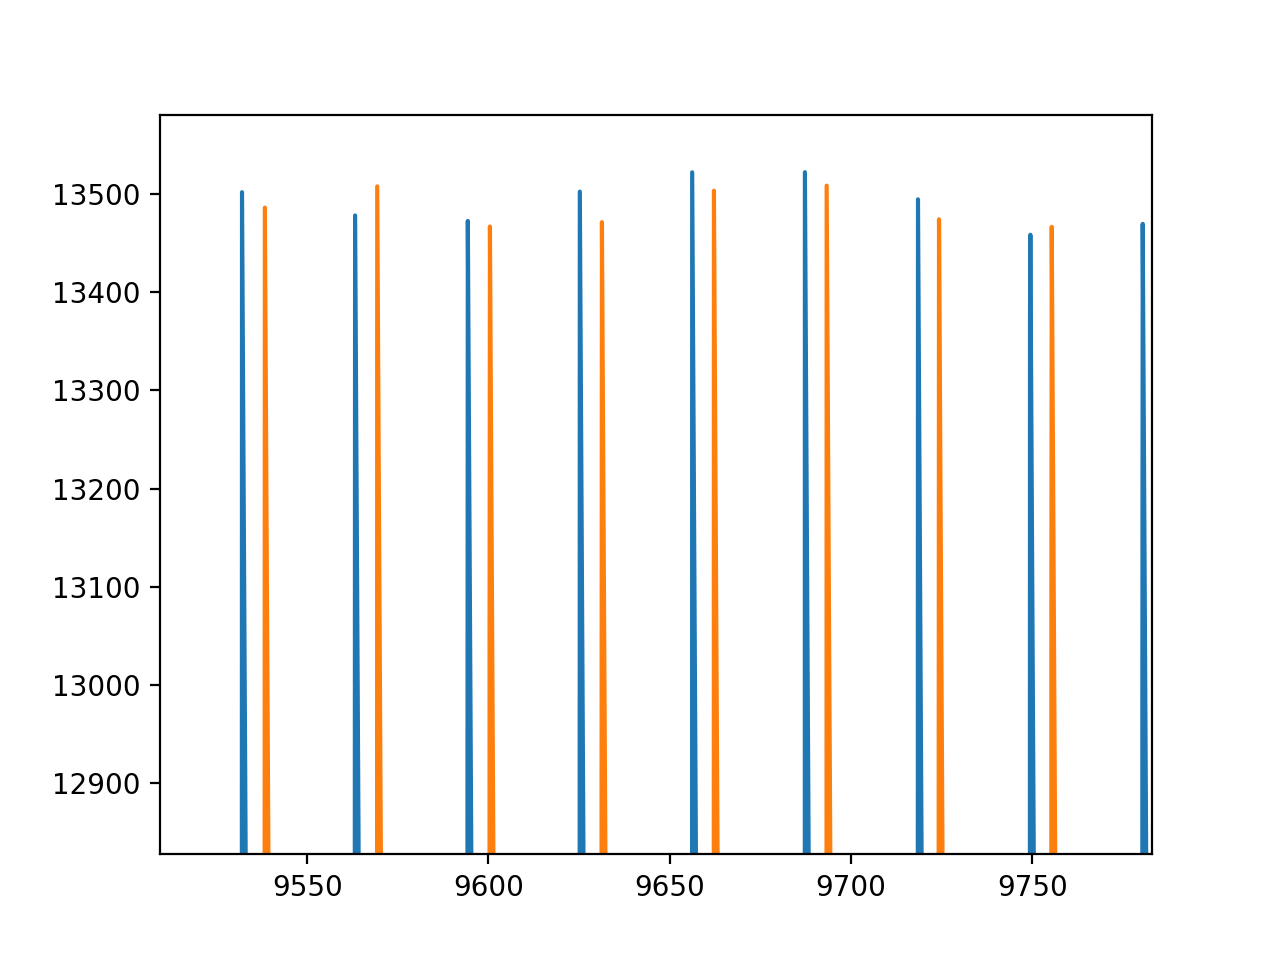

In [26]:
%matplotlib notebook
plt.plot(tm, C0, label = 'IC0')
plt.plot(tm, C1, label = 'IC1')
plt.show()

<IPython.core.display.Javascript object>


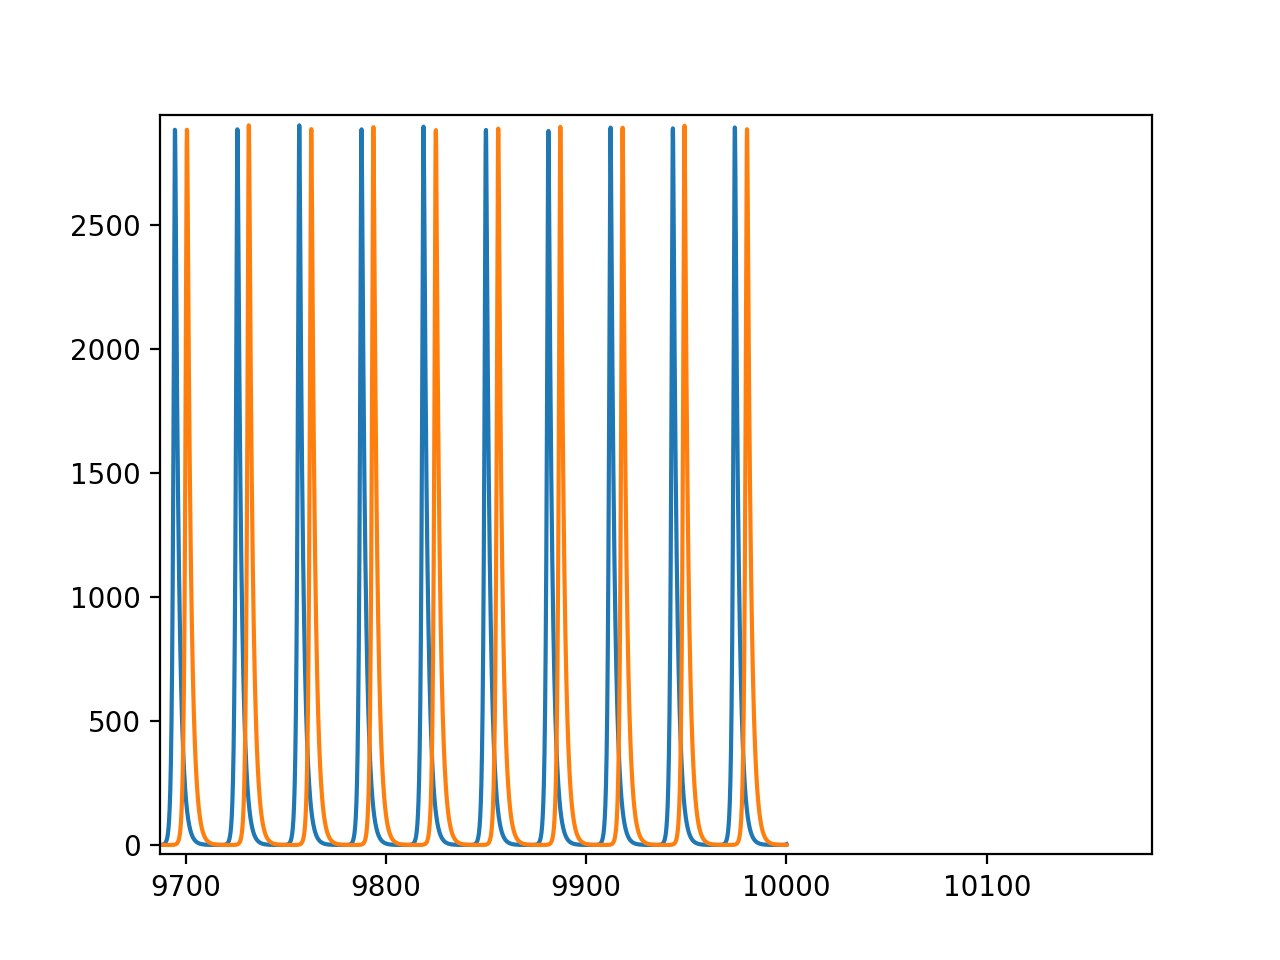

In [27]:
%matplotlib notebook
plt.plot(tm, P0, label = 'IC0')
plt.plot(tm, P1, label = 'IC1')
plt.show()

In [55]:
def RCP (t, u, r1, q1, aC1, eC1, hC1, mC1, aP1, eP1, mP1, hP1): 
    
    du = np.zeros([3, 1])
    
    #variables
    R = u[0]
    C = u[1]
    P = u[2]

    
    du[0] = r1*R*(1 - (R*q1)) - (aC1*R*C)/(1 + (aC1*hC1*R))
    du[1] = (eC1*aC1*R*C)/(1 + (aC1*hC1*R)) - (aP1*C*P)/(1+ (aP1*hP1*C)) - mC1*C
    du[2] = (eP1*aP1*C*P)/(1+ (aP1*hP1*C)) - mP1*P
   
    
    du = du.reshape(3,)
    return(du)

In [48]:
import lhsmdu as lh
prs = lh.createRandomStandardUniformMatrix(10,3)
pr1 = prs
pr1[:,0] = pr1[:,0] * 10000 + 2000
pr1[:,1] = pr1[:,1] * 5000 + 500
pr1[:,2] = pr1[:,2] * 1000 + 10

In [64]:
i=0
u0 = pr1[i,:]
u0

array([10886.93214785,  1701.13583198,   290.21640699])

In [ ]:
# Interactive Mode

%matplotlib notebook
# Create subplots

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax = plt.axes(projection ='3d')

plot1, = ax.plot3D(R0, C0, P0)

# Import Library

for i in np.arange(10):
    
    u0 = pr1[i,:]
    tend = 10000
    t_span = (0, tend)
    tint = np.linspace(0, tend, tend*10)

    sol1 = solve_ivp (RCP, t_span, u0, args = p, t_eval = tint, method= 'RK45', rtol=1e-06, atol=1e-06)
    
    ssv0 = sol1.y[:,5000:]
    np.shape(ssv0)
    R0 = ssv0[0]; C0 = ssv0[1]; P0 = ssv0[2]
    
    plot1.set_xdata(R0)
    plot1.set_ydata(C0)
    plot1.set_zdata(P0)
    
    figure.canvas.draw()
    figure.canvas.flush_events()
    time.sleep(0.1)

plt.show()

<IPython.core.display.Javascript object>